In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.neighbors import KNeighborsClassifier # KNN 분류
from sklearn.neighbors import KNeighborsRegressor # KNN 회귀

In [ ]:
df = pd.read_csv("diabetes.csv")
df.head(2)

In [5]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size = 0.7,
                                     random_state = 123)
len(df_train)

537

In [8]:
model_c = KNeighborsClassifier(n_neighbors = 3).fit(X = df_train.iloc[:, :4],
                                                    y = df_train["Outcome"])
pred = model_c.predict(df_test.iloc[:, :4])
pred[:6]

array([1, 0, 0, 0, 0, 0], dtype=int64)

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [10]:
accuracy_score(y_true = df_test["Outcome"],
               y_pred = pred)

0.7272727272727273

In [12]:
print(KNeighborsRegressor().fit.__doc__)

Fit the model using X as training data and y as target values

        Parameters
        ----------
        X : {array-like, sparse matrix, BallTree, KDTree}
            Training data. If array or matrix, shape [n_samples, n_features],
            or [n_samples, n_samples] if metric='precomputed'.

        y : {array-like, sparse matrix}
            Target values, array of float values, shape = [n_samples]
             or [n_samples, n_outputs]
        


In [13]:
from sklearn.cluster import KMeans

In [25]:
df = pd.read_csv("iris_xlsx.csv")
df.head(2)

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa

In [26]:
df["Species"].value_counts()

setosa        50
virginica     50
versicolor    50
Name: Species, dtype: int64

In [27]:
model = KMeans(n_clusters = 3,
               random_state = 123,
               max_iter = 100).fit(X = df.iloc[:, :-1]) # Species 제외

In [28]:
# model.labels_ # 각 row가 할당된 군집 번호
# model.cluster_centers_ # 각 군집의 중심점

In [29]:
df_center = pd.DataFrame(model.cluster_centers_, 
                         columns = df.columns[:-1])
df_center

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0      5.006000     3.428000      1.462000     0.246000
1      6.850000     3.073684      5.742105     2.071053
2      5.901613     2.748387      4.393548     1.433871

In [30]:
df["cluster"] = model.labels_
df.head(2)

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species  cluster
0           5.1          3.5           1.4          0.2  setosa        0
1           4.9          3.0           1.4          0.2  setosa        0

In [31]:
pd.crosstab(df["Species"], df["cluster"])

cluster      0   1   2
Species               
setosa      50   0   0
versicolor   0   2  48
virginica    0  36  14

In [32]:
from sklearn.cluster import AgglomerativeClustering

In [33]:
df = pd.read_csv("iris_xlsx.csv")
df.head(2)

In [36]:
model = AgglomerativeClustering(n_clusters = 3,
                                affinity = "euclidean",
                                linkage = "ward")
pred = model.fit_predict(df.iloc[:, :-1])
df["cluster"] = pred
pd.crosstab(df["Species"], df["cluster"])

cluster      0   1   2
Species               
setosa       0  50   0
versicolor  49   0   1
virginica   15   0  35

In [38]:
iris = pd.read_csv("iris_xlsx.csv")
iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [42]:
iris.columns = ["SL", "SW", "PL", "PW", "Species"]

In [ ]:
from statsmodels.formula.api import ols
model = ols(formula = "SL ~ SW", data = iris).fit()
model.summary() # p-value가 0.152라서 폐기.

In [44]:
model = ols(formula = "PL ~ PW", data = iris).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PL   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1882.
Date:                Fri, 19 Feb 2021   Prob (F-statistic):           4.68e-86
Time:                        10:45:07   Log-Likelihood:                -101.18
No. Observations:                 150   AIC:                             206.4
Df Residuals:                     148   BIC:                             212.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0836      0.073     14.850      0.000       0.939       1.228
PW             2.2299      0.051     43.387      0.000       2.128       2.332
==============================================================================
Omnibus:                        2.438   Durbin-Watson:                   1.430
Prob(Omnibus):                  0.295   Jarque-Bera (JB):                1.966
Skew:                           0.211   Prob(JB):                        0.374
Kurtosis:                       3.369   Cond. No.                         3.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
bike = pd.read_csv("bike.csv")

In [47]:
"registered ~ " + " + ".join(bike.columns[:4])

'registered ~ datetime + season + holiday + workingday'

In [46]:
model = ols("registered ~ temp + atemp + windspeed + holiday",
            data = bike).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             registered   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     343.4
Date:                Fri, 19 Feb 2021   Prob (F-statistic):          8.30e-279
Time:                        11:05:22   Log-Likelihood:                -69420.
No. Observations:               10886   AIC:                         1.388e+05
Df Residuals:                   10881   BIC:                         1.389e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1818      5.020      0.036      0.971      -9.659      10.022
temp           3.0991      1.040      2.980      0.003       1.060       5.138
atemp          2.9051      0.958      3.033      0.002       1.028       4.782
windspeed      1.9138      0.172     11.141      0.000       1.577       2.250
holiday      -19.0592      8.194     -2.326      0.020     -35.121      -2.998
==============================================================================
Omnibus:                     3040.089   Durbin-Watson:                   0.451
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7907.449
Skew:                           1.516   Prob(JB):                         0.00
Kurtosis:                       5.870   Cond. No.                         213.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
df_resid = pd.DataFrame({"obs": range(len(bike)),
                         "resid": model.resid})
df_resid.head(2)

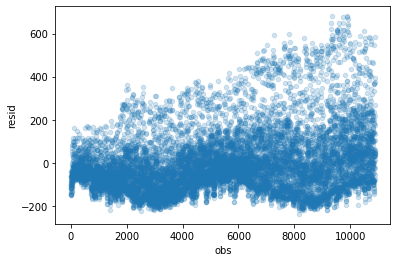

In [54]:
df_resid.plot(kind = "scatter", x = "obs", y = "resid", alpha = 0.2)

In [55]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [56]:
mse = mean_squared_error(y_true = pd.Series([1, 2, 3]),
                         y_pred = pd.Series([1, 9, 3]))
mse

16.333333333333332

In [57]:
mse = mean_squared_error(y_true = pd.Series([1, 2, 3]),
                         y_pred = pd.Series([1, 9, 3]))
mse ** 0.5 # RMSE

4.041451884327381

In [ ]:
# mean_absolute_error()

## 회귀분석 종합!

In [ ]:
dia = pd.read_csv("diamonds.csv")
dia.head(1)

In [72]:
dia_sub = dia[["price", "carat", "cut", "table"]]
dia_sub = pd.get_dummies(dia_sub, drop_first = True)
# dia_sub.head(2)

In [ ]:
dia_sub = dia_sub.rename(columns = {"cut_Very Good": "cut_VeryGood"})
dia_sub.head(2)

In [74]:
dia_train, dia_test = train_test_split(dia_sub, train_size = 0.7,
                                       random_state = 123)

In [77]:
model = ols("price ~ " + " + ".join(dia_train.columns[1:]), 
            data = dia_train).fit()
# model.summary()

In [78]:
pred = model.predict(dia_test)
pred[:4]

32685      32.225321
36258    1559.604278
14429    7151.751641
36250    1125.497108
dtype: float64

In [79]:
mean_squared_error(y_true = dia_test["price"],
                   y_pred = pred) ** 0.5

1510.6094347779099

#### Q. carat이 1, table이 1, 세공수준이 ideal 인 다이아몬드의 가격은?

In [ ]:
dia_1 = pd.DataFrame({"carat": [1], "table": [1], "cut": ["Ideal"]})
dia_1

In [ ]:
pd.get_dummies(dia_1, columns=["cut"])

In [94]:
dia_1 = dia_test.iloc[[0], 1:]
dia_1

carat  table  cut_Good  cut_Ideal  cut_Premium  cut_VeryGood
32685   0.31   57.0         0          0            1             0

In [95]:
dia_1["carat"] = 1
dia_1["table"] = 1
dia_1["cut_Ideal"] = 1
dia_1["cut_Premium"] = 0
model.predict(dia_1)

32685    6892.821683
dtype: float64

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [83]:
df_X = dia_train.iloc[:, 1:] # 종속변수 제외. 독립변수만 사용하여 연산
df_vif = pd.DataFrame()
df_vif["colname"] = df_X.columns
df_vif["VIF"] = [vif(df_X.values, i) for i in range(df_X.shape[1])]
df_vif

colname        VIF
0         carat   4.035031
1         table  35.854017
2      cut_Good   3.924829
3     cut_Ideal  12.850020
4   cut_Premium   9.292420
5  cut_VeryGood   8.012516

## 로지스틱 회귀

In [96]:
from statsmodels.api import Logit

In [118]:
df = pd.read_csv("logistic_regression_01.csv")
df.head(2)

admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3

In [119]:
model = Logit(endog = df["admit"], exog = df.drop("admit", axis = 1)).fit()
# model.summary()

Optimization terminated successfully.
         Current function value: 0.586372
         Iterations 5


In [120]:
model.params # 로지스틱 회귀의 변수 계수

gre     0.001477
gpa    -0.004167
rank   -0.669538
dtype: float64

In [121]:
round(np.exp(model.params), 2) # OR(Odds Ratio)

gre     1.00
gpa     1.00
rank    0.51
dtype: float64

In [122]:
pred = model.predict(df.drop("admit", axis = 1))
pred[:4]

0    0.188105
1    0.259410
2    0.621390
3    0.148537
dtype: float64

In [123]:
pred_class = (pred > 0.5) + 0 # 0.5는 경계값
accuracy_score(y_true = df["admit"], y_pred = pred_class)

0.7075

In [125]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_true = df["admit"], y_score = pred)

0.6685558535952237

## 의사결정나무

In [111]:
from sklearn.tree import DecisionTreeClassifier # 분류나무
from sklearn.tree import DecisionTreeRegressor # 회귀나무

In [113]:
df = pd.read_csv("iris_xlsx.csv")
df.head(1)

In [114]:
df["is_setosa"] = (df["Species"] == "setosa") + 0

In [116]:
model_c = DecisionTreeClassifier(max_depth = 3, random_state = 123)
model_c.fit(X = df.iloc[:, :4], y = df["is_setosa"])
pred_c = model_c.predict(df.iloc[:, :4])
pred_c[:4]

array([1, 1, 1, 1])

In [ ]:
# DecisionTreeRegressor()